In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import tensorflow_hub as hub

import numpy as np

from matplotlib import pyplot as plt

In [2]:
BATCH_SIZE= 32
IMAGE_SIZE= (224, 224)
IMAGE_SHAPE= IMAGE_SIZE+(3,)

AUTOTUNE= tf.data.experimental.AUTOTUNE

In [3]:
(ds_train, ds_val, ds_test), ds_info= tfds.load(
    'beans',
    split= ['train', 'validation', 'test'],
    shuffle_files= True,
    as_supervised= False,
    # batch_size= BATCH_SIZE,
    with_info= True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incomplete4T1ZM3/beans-train.tfrecord


  0%|          | 0/1034 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incomplete4T1ZM3/beans-validation.tfrecord


  0%|          | 0/133 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incomplete4T1ZM3/beans-test.tfrecord


  0%|          | 0/128 [00:00<?, ? examples/s]

Dataset beans downloaded and prepared to /root/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.


In [4]:
ds_info

tfds.core.DatasetInfo(
    name='beans',
    version=0.1.0,
    description='Beans is a dataset of images of beans taken in the field using smartphone
cameras. It consists of 3 classes: 2 disease classes and the healthy class.
Diseases depicted include Angular Leaf Spot and Bean Rust. Data was annotated
by experts from the National Crops Resources Research Institute (NaCRRI) in
Uganda and collected by the Makerere AI research lab.',
    homepage='https://github.com/AI-Lab-Makerere/ibean/',
    features=FeaturesDict({
        'image': Image(shape=(500, 500, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=1295,
    splits={
        'test': 128,
        'train': 1034,
        'validation': 133,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {beansdata,
        author="Makerere AI Lab",
        title="Bean disease dataset",
        month="January",
        year="2020",
        url="https://git

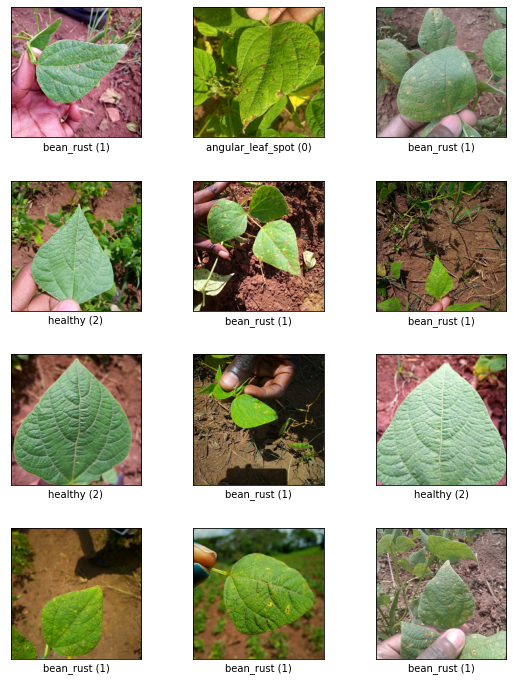

In [5]:
fig= tfds.show_examples(ds_train, ds_info, rows=4, cols=3)

In [6]:
(ds_train, ds_val, ds_test), ds_info= tfds.load(
    'beans',
    split= ['train', 'validation', 'test'],
    shuffle_files= True,
    as_supervised= True,
    batch_size= BATCH_SIZE,
    with_info= True
)

In [7]:
def normalize(image, label):
    image= (tf.cast(image, tf.float32)/127.5)-1

    return image, label

In [8]:
def resize(image, label):
    image= tf.image.resize(image, IMAGE_SIZE)

    return image, label

In [9]:
ds_train= ds_train.map(normalize, num_parallel_calls=AUTOTUNE).map(resize, num_parallel_calls=AUTOTUNE).cache().prefetch(AUTOTUNE)
ds_val= ds_val.map(normalize, num_parallel_calls=AUTOTUNE).map(resize, num_parallel_calls=AUTOTUNE).cache().prefetch(AUTOTUNE)
ds_test= ds_test.map(normalize, num_parallel_calls=AUTOTUNE).map(resize, num_parallel_calls=AUTOTUNE).cache().prefetch(AUTOTUNE)

In [10]:
base_model= hub.KerasLayer("https://tfhub.dev/sayakpaul/vit_r26_s32_lightaug_fe/1", trainable=False)

In [11]:
model = tf.keras.Sequential([
    base_model,
    layers.Dense(ds_info.features['label'].num_classes, 'softmax')
])

In [12]:
optimizer= keras.optimizers.Adam(0.001)
loss= keras.losses.SparseCategoricalCrossentropy()

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [13]:
model.fit(ds_train, epochs=10, validation_data= ds_val)

Epoch 1/10
33/33 [==============================] - 62s 1s/step - loss: 1.6200 - accuracy: 0.5735 - val_loss: 0.9671 - val_accuracy: 0.7519
Epoch 2/10
33/33 [==============================] - 3s 95ms/step - loss: 0.7633 - accuracy: 0.7563 - val_loss: 0.6391 - val_accuracy: 0.7820
Epoch 3/10
33/33 [==============================] - 3s 100ms/step - loss: 0.4959 - accuracy: 0.8259 - val_loss: 0.4767 - val_accuracy: 0.8421
Epoch 4/10
33/33 [==============================] - 3s 96ms/step - loss: 0.3712 - accuracy: 0.8598 - val_loss: 0.3897 - val_accuracy: 0.8571
Epoch 5/10
33/33 [==============================] - 3s 96ms/step - loss: 0.2984 - accuracy: 0.8888 - val_loss: 0.3338 - val_accuracy: 0.8647
Epoch 6/10
33/33 [==============================] - 3s 96ms/step - loss: 0.2521 - accuracy: 0.9072 - val_loss: 0.2954 - val_accuracy: 0.9098
Epoch 7/10
33/33 [==============================] - 3s 98ms/step - loss: 0.2200 - accuracy: 0.9246 - val_loss: 0.2679 - val_accuracy: 0.9173
Epoch 8/10
33

In [14]:
model.evaluate(ds_test)

4/4 [==============================] - 1s 217ms/step - loss: 0.2703 - accuracy: 0.8984


[0.27027732133865356, 0.8984375]

In [16]:
base_model.trainable= True

optimizer= keras.optimizers.Adam(learning_rate=0.00001)

model.compile(
    optimizer= optimizer,
    loss= loss,
    metrics= ['accuracy']
)

In [17]:
model.fit(ds_train, epochs=3, validation_data= ds_val)

Epoch 1/3
33/33 [==============================] - 107s 2s/step - loss: 0.2562 - accuracy: 0.9043 - val_loss: 0.1432 - val_accuracy: 0.9549
Epoch 2/3
33/33 [==============================] - 13s 392ms/step - loss: 0.0272 - accuracy: 0.9913 - val_loss: 0.0920 - val_accuracy: 0.9624
Epoch 3/3
33/33 [==============================] - 13s 395ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0821 - val_accuracy: 0.9624


In [18]:
model.evaluate(ds_test)

4/4 [==============================] - 0s 86ms/step - loss: 0.0581 - accuracy: 0.9844


[0.05807937681674957, 0.984375]